# Visualization

In [2]:
import pandas as pd

results_df = pd.read_pickle('results.pickle')
results_df.head()

,feature,mae,rmse,r2,r2_robust,method,missing_rate,city
0,footprint_area,13122.947986,32831.798392,-0.000305,0.091894,mean,0.1,saint_petersburg
1,build_floor_area,58217.139166,111094.886717,-0.000855,0.138761,mean,0.1,saint_petersburg
2,footprint_area,10356.628466,32069.347814,0.045616,0.900016,sknn,0.1,saint_petersburg
3,build_floor_area,42304.335486,102703.704797,0.144628,0.967242,sknn,0.1,saint_petersburg
4,footprint_area,9935.654587,32148.540260,0.040897,0.928269,idw,0.1,saint_petersburg


In [4]:
results_df.groupby('method').agg({
    'mae': 'mean',
    'rmse': 'mean',
    'r2': 'mean',
    'r2_robust': 'mean'
})

,mae,rmse,r2,r2_robust
method,,,,
idw,25259.082188,60266.038856,0.113772,0.926359
mean,34706.086767,64851.154304,-0.000583,-0.005120
sknn,26348.603639,60327.641289,0.112695,0.898804
sm,18351.554237,43202.666182,0.552464,0.939108
smv-nmf,26405.678178,60263.187888,0.117193,0.889438


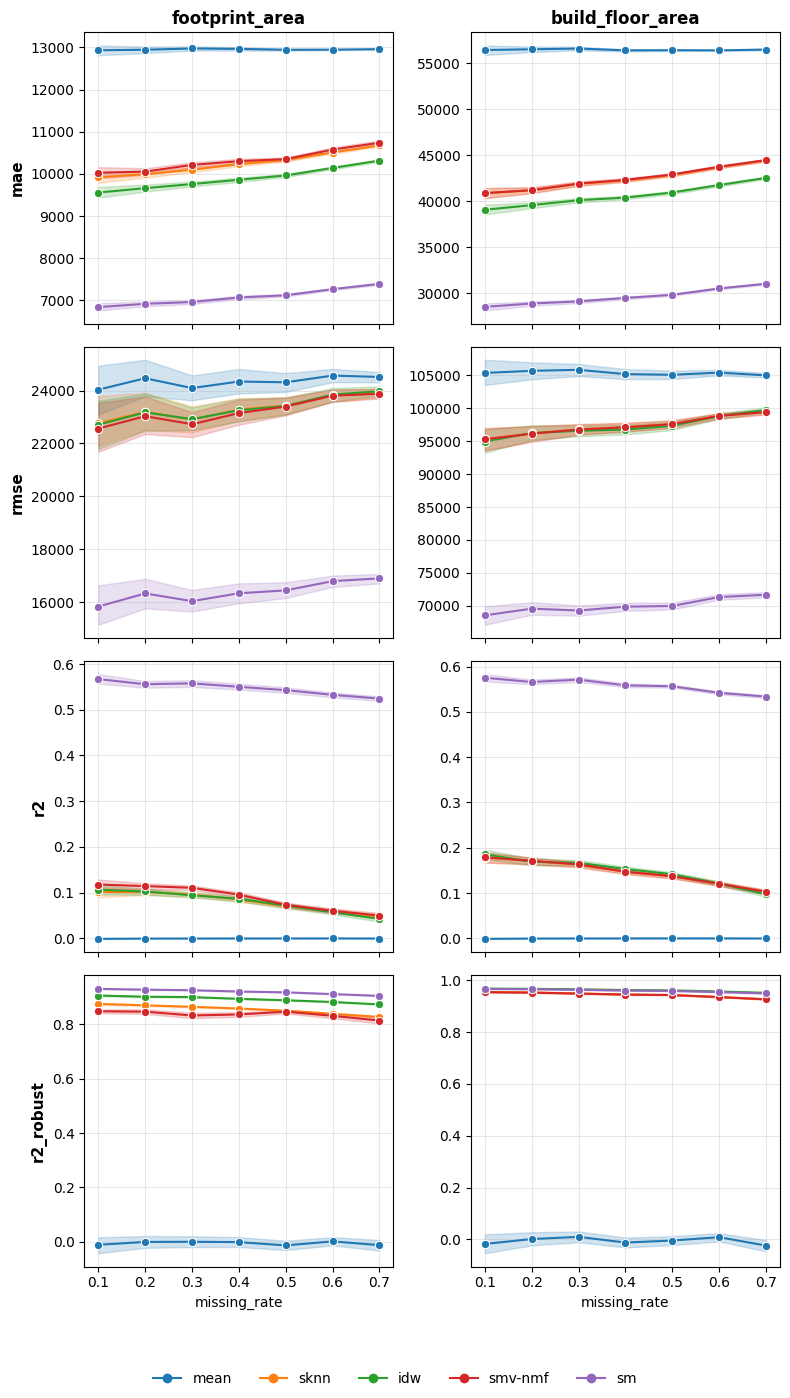

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

metrics = ['mae', 'rmse', 'r2', 'r2_robust']
features = results_df['feature'].unique()
methods = results_df.method.unique()
palette = sns.color_palette("tab10", n_colors=len(methods))

n_rows = len(metrics)
n_cols = len(features)

fig, axes = plt.subplots(
    n_rows, n_cols,
    figsize=(4*n_cols, 3.5*n_rows),
    sharex='col', sharey=False
)

for i, metric in enumerate(metrics):
    for j, feature in enumerate(features):
        ax = axes[i, j] if n_rows > 1 and n_cols > 1 else (axes[j] if n_rows == 1 else axes[i])
        sub = results_df[results_df['feature'] == feature]
        sns.lineplot(
            data=sub,
            x='missing_rate',
            y=metric,
            hue='method',
            marker='o',
            ax=ax,
            palette=palette,
            legend=False 
        )
        if i == 0:
            ax.set_title(feature, fontsize=12, weight='bold') 
        if j == 0:
            ax.set_ylabel(metric, fontsize=11, weight='bold')
        else:
            ax.set_ylabel('')
        if i != n_rows - 1:
            ax.set_xlabel('')
        ax.grid(True, alpha=0.3)

handles = [plt.Line2D([0], [0], color=palette[i], marker='o', label=meth) 
           for i, meth in enumerate(methods)]
labels = methods
fig.legend(
    handles, labels,
    loc='lower center',
    ncol=len(labels),
    frameon=False
)

plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.show()
